In [38]:
import json
import numpy as np
import pandas as pd

In [39]:
def get_test_case_id(tc: str) -> str:
    return tc.split("_")[0]


In [40]:
def get_reference_metric(df, ref):
    
    try:
        kp = 1/df.loc[ref, 'Kr']
        ki = kp/df.loc[ref, 'Tn']
        kd = kp* df.loc[ref, 'Tv']

        # Compute natural frequency (approximation)
        omega_n = np.sqrt(df.loc[ref, 'Kr'] / (df.loc[ref, 'Tn'] * df.loc[ref, 'Tv']))

        # Compute steady-state error for different inputs
        ess_step = 1 / (1 + df.loc[ref, 'Kr'])  # Step input

        # Compute IAE and ITAE
        IAE = 1.5 / omega_n
        ITAE = 1.2 / (omega_n ** 2)

    except:
        print("check this value, can't not be zero")
        
    ref_metrics= {
        'kr' : df.loc[ref, 'Kr'],
        'Tn' : df.loc[ref, 'Tn'],
        'Tv' : df.loc[ref, 'Tv'],
        'PR' : df.loc[ref, 'PR'],
        'RT' : df.loc[ref, 'RT'],
        'kp' : kp,
        'ki' : ki,
        'kd' : kd,
        'ess_step': ess_step,
        'IAE': IAE,
        'ITAE': ITAE,
    }

    return ref_metrics

In [41]:
def get_pid_metric(kr, Tn, Tv):

    # for index, row in df.iterrows():

    try:
        kp = float(round(1/kr))
        ki = float(round(kp/Tn))
        kd = float(round(kp* Tv))
    except:
        print("***********************************************************")
        print("check this value, can't not be zero", kr)
        print("***********************************************************")

    return kp, ki, kd


In [42]:
with open('prueba.json', 'r') as file:
    data = json.load(file)

df_data = pd.DataFrame.from_dict(data, orient="index")
df_data = df_data.reset_index().rename(columns={"index": "test_id"})

for index, row in df_data.iterrows():
    tc_id = get_test_case_id(row["test_id"])
    id = int(row["test_id"].split("_")[-1])
    df_data.at[index, "tc"] = tc_id
    df_data.at[index, "id"] = id
    kp, ki, kd = get_pid_metric(row['Kr'], row['Tn'], row['Tv'])
    df_data.at[index,'kp'] = kp
    df_data.at[index,'ki'] = ki
    df_data.at[index,'kd'] = kd
# df_data = get_reference_metric(df_data, 't0')


In [45]:
only_test_data = df_data[['kp', 'ki', 'kd', 'Kr', 'Tn', 'Tv']]

In [43]:
df_data

,test_id,time,pressureT,speedT,pressureR,speedR,Kr,Tn,Tv,ba,tc,id,kp,ki,kd
0,tc100_def_0,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55....","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9982928026828044, 0.9970688991898139, ...","[0.0, -135.0194091796875, -281.8448181152344, ...",0.09,0.0080,0.050,False,tc100,0.0,11.0,1375.0,1.0
1,tc100_def_1000,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55....","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9982928026828044, 0.9965298136125148, ...","[0.0, -101.65770721435547, -207.40289306640625...",0.09,0.0255,0.025,False,tc100,1000.0,11.0,431.0,0.0
2,tc100_def_1001,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55....","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9982928026828044, 0.996833690863087, 1...","[0.0, -120.46337127685547, -243.17286682128906...",0.12,0.0990,0.060,False,tc100,1001.0,8.0,81.0,0.0
3,tc100_def_100,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55....","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9982928026828044, 0.9970204713172693, ...","[0.0, -132.0224151611328, -273.0996398925781, ...",0.10,0.0120,0.055,False,tc100,100.0,10.0,833.0,1.0
4,tc100_def_101,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55....","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9982928026828044, 0.9971210763138257, ...","[0.0, -138.24842834472656, -282.87322998046875...",0.12,0.0225,0.010,False,tc100,101.0,8.0,356.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,tc106_def_997,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9999310336858431, 0.9999127521886275, ...","[0.0, -183.27420043945312, -377.3757629394531,...",0.15,0.0165,0.060,False,tc106,997.0,7.0,424.0,0.0
3002,tc106_def_998,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9999310336858431, 0.9998265851991328, ...","[0.0, -51.273197174072266, -103.46184539794922...",0.05,0.0660,0.060,False,tc106,998.0,20.0,303.0,1.0
3003,tc106_def_999,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9999310336858431, 0.9998350540831223, ...","[0.0, -64.24685668945312, -130.2565155029297, ...",0.06,0.0390,0.080,False,tc106,999.0,17.0,436.0,1.0
3004,tc106_def_99,"[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006...","[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...","[0.0, -209.1667022705078, -418.4268493652344, ...","[1.0, 0.9999310336858431, 0.9998633023110479, ...","[0.0, -107.52090454101562, -224.6172637939453,...",0.07,0.0075,0.080,False,tc106,99.0,14.0,1867.0,1.0


In [47]:
only_test_data = only_test_data.drop_duplicates()

In [49]:
only_test_data.to_csv('only_test_data.csv')

In [51]:
kp_ki_kd_info = only_test_data[['kp', 'ki', 'kd']].describe(include='all')
print(kp_ki_kd_info)

                kp            ki           kd
count  1002.000000   1002.000000  1002.000000
mean      9.232535    820.770459     0.197605
std       4.885995   1635.480004     0.415574
min       3.000000     30.000000     0.000000
25%       6.000000    175.250000     0.000000
50%       8.000000    342.000000     0.000000
75%      11.000000    731.500000     0.000000
max      20.000000  20000.000000     2.000000


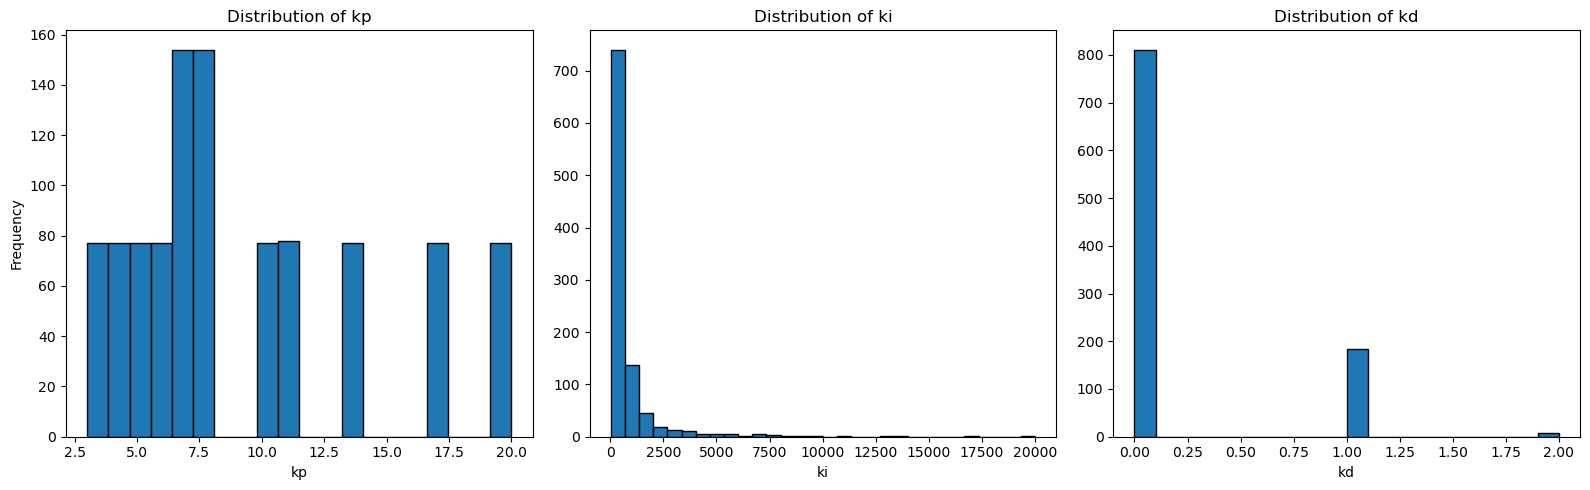

In [53]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(16, 5))

# Plot kp
plt.subplot(1, 3, 1)
plt.hist(only_test_data['kp'], bins=20, edgecolor='black')
plt.title('Distribution of kp')
plt.xlabel('kp')
plt.ylabel('Frequency')

# Plot ki
plt.subplot(1, 3, 2)
plt.hist(only_test_data['ki'], bins=30, edgecolor='black')
plt.title('Distribution of ki')
plt.xlabel('ki')

# Plot kd
plt.subplot(1, 3, 3)
plt.hist(only_test_data['kd'], bins=20, edgecolor='black')
plt.title('Distribution of kd')
plt.xlabel('kd')

plt.tight_layout()
plt.show()


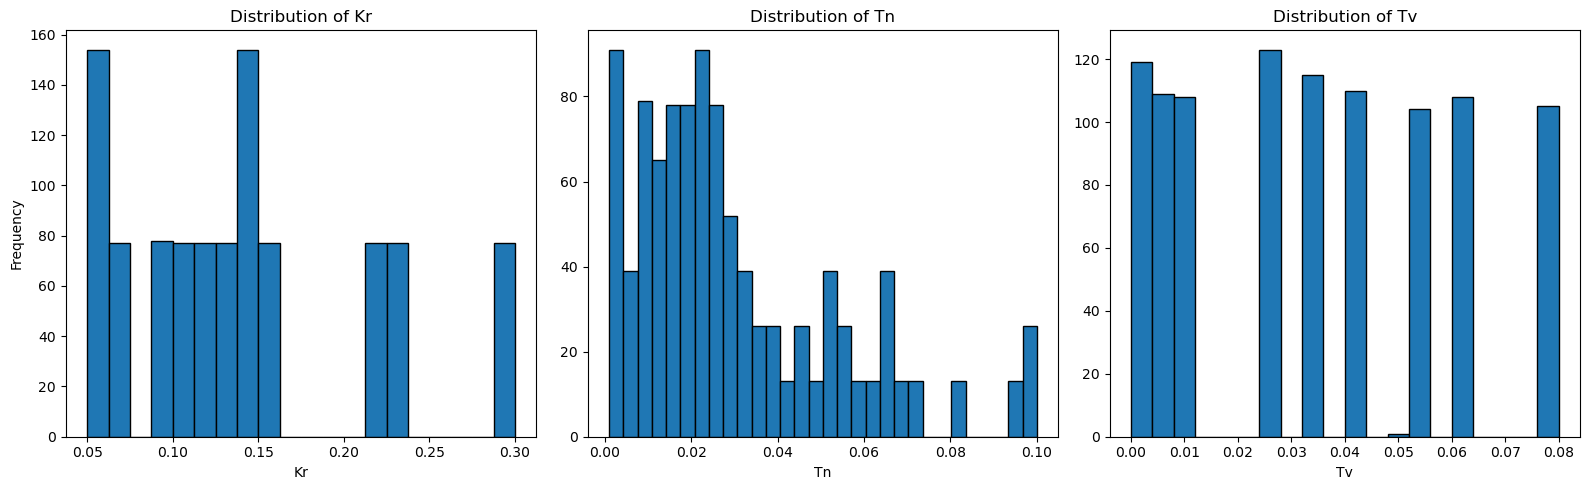

In [54]:
plt.figure(figsize=(16, 5))

# Plot kp
plt.subplot(1, 3, 1)
plt.hist(only_test_data['Kr'], bins=20, edgecolor='black')
plt.title('Distribution of Kr')
plt.xlabel('Kr')
plt.ylabel('Frequency')

# Plot ki
plt.subplot(1, 3, 2)
plt.hist(only_test_data['Tn'], bins=30, edgecolor='black')
plt.title('Distribution of Tn')
plt.xlabel('Tn')

# Plot kd
plt.subplot(1, 3, 3)
plt.hist(only_test_data['Tv'], bins=20, edgecolor='black')
plt.title('Distribution of Tv')
plt.xlabel('Tv')

plt.tight_layout()
plt.show()

In [57]:
from itertools import product

# Get the reference values from row index 0
ref_kp = only_test_data.loc[0, 'kp']
ref_ki = only_test_data.loc[0, 'ki']
ref_kd = only_test_data.loc[0, 'kd']

# Create comparison masks for kp
kp_higher = only_test_data['kp'] > ref_kp
kp_lower = only_test_data['kp'] < ref_kp
kp_equal = only_test_data['kp'] == ref_kp

# Create comparison masks for ki
ki_higher = only_test_data['ki'] > ref_ki
ki_lower = only_test_data['ki'] < ref_ki
ki_equal = only_test_data['ki'] == ref_ki

# Create comparison masks for kd
kd_higher = only_test_data['kd'] > ref_kd
kd_lower = only_test_data['kd'] < ref_kd
kd_equal = only_test_data['kd'] == ref_kd

# Define all combinations with 'lower', 'equal', 'higher'
comparison_states = ('lower', 'equal', 'higher')
combinations_with_equal = list(product(comparison_states, repeat=3))

# Count matching rows for each combination
results_with_equal = []

for kp_cmp, ki_cmp, kd_cmp in combinations_with_equal:
    kp_mask = kp_higher if kp_cmp == 'higher' else (kp_lower if kp_cmp == 'lower' else kp_equal)
    ki_mask = ki_higher if ki_cmp == 'higher' else (ki_lower if ki_cmp == 'lower' else ki_equal)
    kd_mask = kd_higher if kd_cmp == 'higher' else (kd_lower if kd_cmp == 'lower' else kd_equal)
    
    mask = kp_mask & ki_mask & kd_mask
    count = mask.sum()
    
    results_with_equal.append({
        'kp': kp_cmp,
        'ki': ki_cmp,
        'kd': kd_cmp,
        'count': count
    })

# Convert to DataFrame
comparison_with_equal_df = pd.DataFrame(results_with_equal)

# Display the result
print(comparison_with_equal_df.sort_values(by="count", ascending=False).reset_index(drop=True))


        kp      ki      kd  count
0    lower   lower   lower    592
1   higher   lower   equal     86
2   higher   lower   lower     85
3    lower  higher   lower     52
4    equal   lower   lower     45
5    lower   lower   equal     42
6   higher  higher   lower     30
7   higher  higher   equal     23
8    equal   lower   equal     21
9    lower  higher   equal      7
10  higher   lower  higher      6
11   equal  higher   lower      6
12   equal  higher   equal      4
13   equal   equal   equal      1
14   equal   equal   lower      1
15  higher  higher  higher      1
16   equal   equal  higher      0
17   equal   lower  higher      0
18   equal  higher  higher      0
19   lower  higher  higher      0
20   lower   equal  higher      0
21   lower   equal   equal      0
22  higher   equal   lower      0
23  higher   equal   equal      0
24  higher   equal  higher      0
25   lower   equal   lower      0
26   lower   lower  higher      0


In [62]:

individual_comparisons = {
    'parameter': [],
    'comparison': [],
    'count': []
}

# For kp
individual_comparisons['parameter'].extend(['kp'] * 3)
individual_comparisons['comparison'].extend(['lower', 'equal', 'higher'])
individual_comparisons['count'].extend([
    (only_test_data['kp'] < ref_kp).sum(),
    (only_test_data['kp'] == ref_kp).sum(),
    (only_test_data['kp'] > ref_kp).sum()
])

# For ki
individual_comparisons['parameter'].extend(['ki'] * 3)
individual_comparisons['comparison'].extend(['lower', 'equal', 'higher'])
individual_comparisons['count'].extend([
    (only_test_data['ki'] < ref_ki).sum(),
    (only_test_data['ki'] == ref_ki).sum(),
    (only_test_data['ki'] > ref_ki).sum()
])

# For kd
individual_comparisons['parameter'].extend(['kd'] * 3)
individual_comparisons['comparison'].extend(['lower', 'equal', 'higher'])
individual_comparisons['count'].extend([
    (only_test_data['kd'] < ref_kd).sum(),
    (only_test_data['kd'] == ref_kd).sum(),
    (only_test_data['kd'] > ref_kd).sum()
])

# Create DataFrame
individual_comparison_df = pd.DataFrame(individual_comparisons)
print("Individual Parameter Comparison", individual_comparison_df)


Individual Parameter Comparison   parameter comparison  count
0        kp      lower    693
1        kp      equal     78
2        kp     higher    231
3        ki      lower    877
4        ki      equal      2
5        ki     higher    123
6        kd      lower    811
7        kd      equal    184
8        kd     higher      7
